In [ ]:
import pandas as pd # data analysis
import requests # get url
from bs4 import BeautifulSoup # data scraping
import matplotlib.pyplot as plt # Data visualisation 
import datetime # Check week number
import numpy as np
import datetime as dt #convert date into spesfic format
import re
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression  
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
! pip install requests
! pip install beautifulsoup4
! pip install lxml

In [17]:
! pip install et_xmlfile

  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-cp37-none-any.whl size=8914 sha256=32bb070602375dbf0d16d90b59999e3421e83f407aee504cf0a5128d7c641f34
  Stored in directory: /Users/Mony/Library/Caches/pip/wheels/2a/77/35/0da0965a057698121fc7d8c5a7a9955cdbfb3cc4e2423cad39
Successfully built et-xmlfile


### Scraping all links of the top 2018 movies in the Box Office Mojo

In [42]:
all_pages=[]
all_url=["https://www.boxofficemojo.com/yearly/chart/?page=%s&view=releasedate&view2=domestic&yr=2018&p=.htm"%(page_number) for page_number in range(1,10)]
final_links=[]

def all_links (url):
    response = requests.get(url)
    page=response.text
    soup=BeautifulSoup(page,"html.parser")
    table=soup.find("table",attrs={"cellpadding":"5"})
    rows=table.find_all("tr")
    if url == "https://www.boxofficemojo.com/yearly/chart/?page=9&view=releasedate&view2=domestic&yr=2018&p=.htm":
        link_list=rows[2:80]
    else:
        link_list=rows[2:101]
    links=[link.a.get("href") for link in link_list ]
    all_links=["https://www.boxofficemojo.com%s"%(elem) for elem in links]
    return all_links

def remove_nested_list(nested_list):
    for one_page in nested_list:
        if type(one_page)==list:
            remove_nested_list(one_page)
        else:
            final_links.append(one_page)

for one_url in all_url:
    results=all_links(one_url)
    all_pages.append(results)
print(len(all_pages))
#print(all_links ("https://www.boxofficemojo.com/yearly/chart/?page=2&view=releasedate&view2=domestic&yr=2019&p=.htm"))
remove_nested_list(all_pages)
print(len(final_links))
#print(final_links)

final_links.remove("https://www.boxofficemojo.com/studio/chart/?studio=fathom.htm")
final_links.remove("https://www.boxofficemojo.com/movies/?id=crime+unishment18.htm")
print(len(final_links))


9
870
868


### Collecting all the features of the top 2018 movies in the Box Office Mojo and building a dataframe

In [43]:
title=[]
domestic_total_gross=[]
distributor=[]
release_date=[]
runtime=[]
production_budget=[]
MPAA_rating=[]
genre=[]



def convert_minuts(min):
    
    if min == "N/A":
        return "N/A"
    else: 
        numbers = re.findall("\d+", min)
        h=int(numbers[0])
        m=int(numbers[1])
        total = m + (h*60)
        return int(total)



def movies (movies_url):

    movie_url=movies_url
    respon4 = requests.get(movie_url)
    print(respon4.status_code)
    print(i,movie_url)
    all_text=respon4.text
    soup4=BeautifulSoup(all_text,"html.parser")
    table=soup4.find("table",attrs={"cellpadding":"4"})
    
    
    
    title.append(soup4.find('title').text.split("(")[0].strip())
    domestic_total_gross.append(table.font.b.text.replace("$","").replace(",",""))
    distributor.append(soup4.find(text="Distributor: ").findNextSibling().text)
    release_date.append(soup4.find(text="Release Date: ").findNext('a').text)
    
    
    Alltime=soup4.find(text="Runtime: ").findNextSibling().text
    time=convert_minuts(Alltime)
    runtime.append(time)
    
    
    #runtime.append(soup4.find(text="Runtime: ").findNextSibling().text)
    
    
    
    
    
    
    production_budget.append(soup4.find(text="Production Budget: ").findNextSibling().text.replace("$","").replace("million","000000"))
    MPAA_rating.append(soup4.find(text="MPAA Rating: ").findNextSibling().text)
    genre.append(soup4.find(text="Genre: ").findNextSibling().text)
 

for i,individual_url in enumerate(final_links):
    print(i)
    movies(individual_url)

0
200
0 https://www.boxofficemojo.com/movies/?id=marvel2017b.htm
1
200
1 https://www.boxofficemojo.com/movies/?id=marvel0518.htm
2
200
2 https://www.boxofficemojo.com/movies/?id=theincredibles2.htm
3
200
3 https://www.boxofficemojo.com/movies/?id=jurassicworldsequel.htm
4
200
4 https://www.boxofficemojo.com/movies/?id=dcfilm0617.htm
5
200
5 https://www.boxofficemojo.com/movies/?id=foxmarvel18.htm
6
200
6 https://www.boxofficemojo.com/movies/?id=grinch2017.htm
7
200
7 https://www.boxofficemojo.com/movies/?id=missionimpossible6.htm
8
200
8 https://www.boxofficemojo.com/movies/?id=ant-manandthewasp.htm
9
200
9 https://www.boxofficemojo.com/movies/?id=bohemianrhapsody.htm
10
200
10 https://www.boxofficemojo.com/movies/?id=astarisborn2018.htm
11
200
11 https://www.boxofficemojo.com/movies/?id=untitledhansolostarwarsanthologyfilm.htm
12
200
12 https://www.boxofficemojo.com/movies/?id=venom2018.htm
13
200
13 https://www.boxofficemojo.com/movies/?id=wreckitralph2.htm
14
200
14 https://www.boxo

200
119 https://www.boxofficemojo.com/movies/?id=thedarkestminds.htm
120
200
120 https://www.boxofficemojo.com/movies/?id=threeidenticalstrangers.htm
121
200
121 https://www.boxofficemojo.com/movies/?id=upgrade.htm
122
200
122 https://www.boxofficemojo.com/movies/?id=padmaavat.htm
123
200
123 https://www.boxofficemojo.com/movies/?id=oldmanthegun.htm
124
200
124 https://www.boxofficemojo.com/movies/?id=hellfest.htm
125
200
125 https://www.boxofficemojo.com/movies/?id=untitledrobertzemeckisproject.htm
126
200
126 https://www.boxofficemojo.com/movies/?id=themiracleseason.htm
127
200
127 https://www.boxofficemojo.com/movies/?id=thewife.htm
128
200
128 https://www.boxofficemojo.com/movies/?id=midnightsun.htm
129
200
129 https://www.boxofficemojo.com/movies/?id=tully2018.htm
130
200
130 https://www.boxofficemojo.com/movies/?id=traffik.htm
131
200
131 https://www.boxofficemojo.com/movies/?id=unfriended2.htm
132
200
132 https://www.boxofficemojo.com/movies/?id=canyoueverforgiveme.htm
133
200
1

200
237 https://www.boxofficemojo.com/movies/?id=metsamsonetdalila18.htm
238
200
238 https://www.boxofficemojo.com/movies/?id=andhadhun.htm
239
200
239 https://www.boxofficemojo.com/movies/?id=spiritedaway2018.htm
240
200
240 https://www.boxofficemojo.com/movies/?id=metluisamiller.htm
241
200
241 https://www.boxofficemojo.com/movies/?id=leanonpete.htm
242
200
242 https://www.boxofficemojo.com/movies/?id=myneighbortotoro18.htm
243
200
243 https://www.boxofficemojo.com/movies/?id=metoperalelisirdamore.htm
244
200
244 https://www.boxofficemojo.com/movies/?id=wildlife18.htm
245
200
245 https://www.boxofficemojo.com/movies/?id=thedarkcrystalrerelease.htm
246
200
246 https://www.boxofficemojo.com/movies/?id=zero.htm
247
200
247 https://www.boxofficemojo.com/movies/?id=metoperasemiramide.htm
248
200
248 https://www.boxofficemojo.com/movies/?id=metlafanciulladelwest.htm
249
200
249 https://www.boxofficemojo.com/movies/?id=nothingtolose2018.htm
250
200
250 https://www.boxofficemojo.com/movies/?

200
350 https://www.boxofficemojo.com/movies/?id=believer.htm
351
200
351 https://www.boxofficemojo.com/movies/?id=mountain.htm
352
200
352 https://www.boxofficemojo.com/movies/?id=kusamainfinity.htm
353
200
353 https://www.boxofficemojo.com/movies/?id=wizardofoz2018.htm
354
200
354 https://www.boxofficemojo.com/movies/?id=suiciderippleeffect.htm
355
200
355 https://www.boxofficemojo.com/movies/?id=sailormoonrs.htm
356
200
356 https://www.boxofficemojo.com/movies/?id=russtaffistillbelieve.htm
357
200
357 https://www.boxofficemojo.com/movies/?id=shine2018.htm
358
200
358 https://www.boxofficemojo.com/movies/?id=hichki.htm
359
200
359 https://www.boxofficemojo.com/movies/?id=flower.htm
360
200
360 https://www.boxofficemojo.com/movies/?id=bolshoithenutcracker.htm
361
200
361 https://www.boxofficemojo.com/movies/?id=theoperahouse.htm
362
200
362 https://www.boxofficemojo.com/movies/?id=theriotandthedance.htm
363
200
363 https://www.boxofficemojo.com/movies/?id=bolshoiballet2018romeoandjuli

200
463 https://www.boxofficemojo.com/movies/?id=badreputation.htm
464
200
464 https://www.boxofficemojo.com/movies/?id=museo.htm
465
200
465 https://www.boxofficemojo.com/movies/?id=harrypotter718.htm
466
200
466 https://www.boxofficemojo.com/movies/?id=nightlivingdead50.htm
467
200
467 https://www.boxofficemojo.com/movies/?id=thelittlemermaid2018.htm
468
200
468 https://www.boxofficemojo.com/movies/?id=mrsmithgoestowashington18.htm
469
200
469 https://www.boxofficemojo.com/movies/?id=bestfriendsvolumetwo.htm
470
200
470 https://www.boxofficemojo.com/movies/?id=harrypotter518.htm
471
200
471 https://www.boxofficemojo.com/movies/?id=rudy25thanniversary.htm
472
200
472 https://www.boxofficemojo.com/movies/?id=harrypotter618.htm
473
200
473 https://www.boxofficemojo.com/movies/?id=metmadamabutterfly.htm
474
200
474 https://www.boxofficemojo.com/movies/?id=meteugeneonegin.htm
475
200
475 https://www.boxofficemojo.com/movies/?id=iltrovatore2018.htm
476
200
476 https://www.boxofficemojo.com

200
577 https://www.boxofficemojo.com/movies/?id=3100runandbecome.htm
578
200
578 https://www.boxofficemojo.com/movies/?id=beuys.htm
579
200
579 https://www.boxofficemojo.com/movies/?id=fengshui.htm
580
200
580 https://www.boxofficemojo.com/movies/?id=monroviaindiana.htm
581
200
581 https://www.boxofficemojo.com/movies/?id=lizandthebluebird.htm
582
200
582 https://www.boxofficemojo.com/movies/?id=gardener.htm
583
200
583 https://www.boxofficemojo.com/movies/?id=nevergoinback.htm
584
200
584 https://www.boxofficemojo.com/movies/?id=viperclub.htm
585
200
585 https://www.boxofficemojo.com/movies/?id=whereiskyra.htm
586
200
586 https://www.boxofficemojo.com/movies/?id=bombcity.htm
587
200
587 https://www.boxofficemojo.com/movies/?id=digimonloss.htm
588
200
588 https://www.boxofficemojo.com/movies/?id=westwood.htm
589
200
589 https://www.boxofficemojo.com/movies/?id=hornfromtheheart.htm
590
200
590 https://www.boxofficemojo.com/movies/?id=akidlikejake.htm
591
200
591 https://www.boxofficemo

200
693 https://www.boxofficemojo.com/movies/?id=ganja2018.htm
694
200
694 https://www.boxofficemojo.com/movies/?id=thehappys.htm
695
200
695 https://www.boxofficemojo.com/movies/?id=ava.htm
696
200
696 https://www.boxofficemojo.com/movies/?id=wonderwhofiredthegun.htm
697
200
697 https://www.boxofficemojo.com/movies/?id=thedevilfish.htm
698
200
698 https://www.boxofficemojo.com/movies/?id=icedragon.htm
699
200
699 https://www.boxofficemojo.com/movies/?id=thedevilandfatheramorth.htm
700
200
700 https://www.boxofficemojo.com/movies/?id=izzygetsthefuckacrosstown.htm
701
200
701 https://www.boxofficemojo.com/movies/?id=apocalypsis.htm
702
200
702 https://www.boxofficemojo.com/movies/?id=eighthoursdontmakeaday.htm
703
200
703 https://www.boxofficemojo.com/movies/?id=onesingstheotherdoesnt.htm
704
200
704 https://www.boxofficemojo.com/movies/?id=activemeasures.htm
705
200
705 https://www.boxofficemojo.com/movies/?id=freakshow.htm
706
200
706 https://www.boxofficemojo.com/movies/?id=whowearen

200
807 https://www.boxofficemojo.com/movies/?id=12days.htm
808
200
808 https://www.boxofficemojo.com/movies/?id=intersection2018.htm
809
200
809 https://www.boxofficemojo.com/movies/?id=notesonappearance.htm
810
200
810 https://www.boxofficemojo.com/movies/?id=thetextureoffalling.htm
811
200
811 https://www.boxofficemojo.com/movies/?id=socialanimals.htm
812
200
812 https://www.boxofficemojo.com/movies/?id=anlaminute.htm
813
200
813 https://www.boxofficemojo.com/movies/?id=edwardii2018.htm
814
200
814 https://www.boxofficemojo.com/movies/?id=statusupdate.htm
815
200
815 https://www.boxofficemojo.com/movies/?id=theothersideofeverything.htm
816
200
816 https://www.boxofficemojo.com/movies/?id=thelongdumbroad.htm
817
200
817 https://www.boxofficemojo.com/movies/?id=kangaroo.htm
818
200
818 https://www.boxofficemojo.com/movies/?id=kickboxerretaliation.htm
819
200
819 https://www.boxofficemojo.com/movies/?id=weightless.htm
820
200
820 https://www.boxofficemojo.com/movies/?id=thepeacemaker20

### Create CSV file to store all the information

In [44]:
df=pd.DataFrame({"Title":title,"Domestic_Total_Gross":domestic_total_gross,
                 "Distributor":distributor,
                "Release_Date":release_date,
                "Runtime":runtime,
                "Production_Budget":production_budget,
                "MPAA_Rating":MPAA_rating,
                "Genre":genre})

In [45]:
df.shape

(868, 8)

In [46]:
df.to_csv("Movies_Screped_Data2018.csv")

### Data Cleaning

In [ ]:
df=pd.read_csv("Movies_Screped_Data2018.csv", index_col=0)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df['Release_Date']= pd.to_datetime(df['Release_Date']) 

In [ ]:
df['Release_Date'] = df['Release_Date'].apply(lambda x: dt.datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'),errors = 'coerce')

In [ ]:
df["Month"]=df.Release_Date.dt.strftime('%m')

In [ ]:
df["Day"]=df.Release_Date.dt.strftime('%d')

In [ ]:
df['day_of_year'] = df['Release_Date'].dt.dayofyear

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.columns

In [ ]:
#df.groupby('MPAA_Rating').nunique()


In [ ]:
len(df.Title.unique())

In [ ]:
df.Genre.value_counts()

In [ ]:
#df.Distributor.value_counts()[:20]

In [ ]:
len(df.MPAA_Rating.unique())

In [ ]:
#df["Production_Budget"]=df["Production_Budget"].replace("N/A",np.nan)

In [ ]:
#df.Production_Budget.isnull().sum()

In [ ]:
df['Domestic_Total_Gross'] = df['Domestic_Total_Gross'].apply(lambda x: x.replace("(Estimate)",""))

In [ ]:
df = df.astype({"Domestic_Total_Gross": int})

### Show highest movie depending on the Domestic_Total_Gross

In [27]:
df.sort_values('Domestic_Total_Gross', ascending=False).head(5)

,Title,Domestic_Total_Gross,Distributor,Release_Date,Runtime,Production_Budget,MPAA_Rating,Genre,Month,Day,day_of_year
0,Black Panther,700059566,Buena Vista,2018-02-16,140.0,NaN,PG-13,Action / Adventure,02,16,47
1,Avengers: Infinity War,678815482,Buena Vista,2018-04-27,156.0,NaN,PG-13,Action / Adventure,04,27,117
2,Incredibles 2,608581744,Buena Vista,2018-06-15,118.0,NaN,PG,Animation,06,15,166
3,Jurassic World: Fallen Kingdom,417719760,Universal,2018-06-22,128.0,170 000000,PG-13,Action / Adventure,06,22,173
4,Aquaman,335061807,Warner Bros.,2018-12-21,139.0,NaN,PG-13,Action / Adventure,12,21,355


### Dealing with catogrical data

In [28]:
df1=df.copy()

In [29]:
#we can package all of this into a function...

def explode(frame,cat_col,sep=','):
    '''inputs-
    frame: input dataframe
    cat_col: name of the category column
    sep: is the seperator between the catgories
    
    output-
    new dataframe with binary values for category columns
    '''
    df=frame.copy()
    df[cat_col]=df[cat_col].apply(lambda x: x.replace(' ','').split(sep))
    categories=list(set(df[cat_col].sum()))
    df_cat=pd.DataFrame(0,index=df.index,columns=categories)
    for cat in categories:
        df_cat[cat]=df[cat_col].apply(lambda cat_list: int(cat in cat_list))
    return pd.concat([df,df_cat],axis=1)

In [30]:
df1=explode(df,'Genre',sep='/')

In [31]:
df1.shape

(868, 58)

In [32]:
df1.columns

Index(['Title', 'Domestic_Total_Gross', 'Distributor', 'Release_Date',
       'Runtime', 'Production_Budget', 'MPAA_Rating', 'Genre', 'Month', 'Day',
       'day_of_year', 'WarDrama', 'FamilyAdventure', 'FantasyComedy', 'Comedy',
       'Adventure', 'ActionDrama', 'Animation', 'Romance', 'RomanticThriller',
       'SportsAction', 'Family', 'Thriller', 'Sci-FiAction', 'FamilyComedy',
       'Western', 'RomanticComedy', 'Documentary', 'Sci-Fi', 'Unknown',
       'PeriodDrama', 'War', 'Drama', 'MusicDrama', 'Concert', 'Sports',
       'Fantasy', 'Action', 'ActionHorror', 'CrimeThriller', 'Crime',
       'HorrorComedy', 'Sci-FiHorror', 'Sci-FiFantasy', 'Foreign',
       'HistoricalDrama', 'Horror', 'Sci-FiAdventure', 'ActionThriller',
       'Musical', 'CrimeComedy', 'Sci-FiComedy', 'Sci-FiThriller',
       'SportsDrama', 'CrimeDrama', 'ComedyThriller', 'HorrorThriller',
       'ActionComedy'],
      dtype='object')

In [33]:
#df1["Comedy"]=df1["Comedy"]+df1["Sci-FiComedy"]+df1["RomanticComedy"]+df1["FantasyComedy"]+df1["ActionComedy"]+df1["SportsComedy"]+df1["AdventureComedy"]+df1["FamilyComedy"]+df1["CrimeComedy"]

In [34]:
df1['Komedy']=df1[df1.columns[df1.columns.map(lambda x: 'comedy' in x.lower() )]].any(axis=1)

In [35]:
comady_columns_delete=df1.columns[df1.columns.map(lambda x: 'comedy' in x.lower() )]

In [36]:
comady_columns_delete

Index(['FantasyComedy', 'Comedy', 'FamilyComedy', 'RomanticComedy',
       'HorrorComedy', 'CrimeComedy', 'Sci-FiComedy', 'ComedyThriller',
       'ActionComedy'],
      dtype='object')

In [37]:
df1.shape

(868, 59)

In [38]:
#df2.drop(columns=[lambda x: x in comady_columns.values],axis=1)
#df2 = [x.drop(['Ticket','Cabin'], axis=1) for x in comady_columns]

In [39]:
df1[df1.columns[df1.columns.map(lambda x: not('comedy' in x.lower())) ]]

,Title,Domestic_Total_Gross,Distributor,Release_Date,Runtime,Production_Budget,MPAA_Rating,Genre,Month,Day,...,HistoricalDrama,Horror,Sci-FiAdventure,ActionThriller,Musical,Sci-FiThriller,SportsDrama,CrimeDrama,HorrorThriller,Komedy
0,Black Panther,700059566,Buena Vista,2018-02-16,140.0,NaN,PG-13,"[Action, Adventure]",02,16,...,0,0,0,0,0,0,0,0,0,False
1,Avengers: Infinity War,678815482,Buena Vista,2018-04-27,156.0,NaN,PG-13,"[Action, Adventure]",04,27,...,0,0,0,0,0,0,0,0,0,False
2,Incredibles 2,608581744,Buena Vista,2018-06-15,118.0,NaN,PG,[Animation],06,15,...,0,0,0,0,0,0,0,0,0,False
3,Jurassic World: Fallen Kingdom,417719760,Universal,2018-06-22,128.0,170 000000,PG-13,"[Action, Adventure]",06,22,...,0,0,0,0,0,0,0,0,0,False
4,Aquaman,335061807,Warner Bros.,2018-12-21,139.0,NaN,PG-13,"[Action, Adventure]",12,21,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,Gangsterdam,954,Distrib Films,2018-09-19,100.0,NaN,Unrated,[ComedyThriller],09,19,...,0,0,0,0,0,0,0,0,0,True
864,The Breadwinner,834,Gathr Films,2018-04-13,94.0,NaN,PG-13,[Animation],04,13,...,0,0,0,0,0,0,0,0,0,False
865,TVTV: Video Revolutionaries,812,First Run,2018-10-19,82.0,NaN,Unrated,[Documentary],10,19,...,0,0,0,0,0,0,0,0,0,False
866,Higher Power,528,Magnolia,2018-05-11,93.0,NaN,R,[Action],05,11,...,0,0,0,0,0,0,0,0,0,False


In [140]:
np.cos(2*np.pi*150/364),np.sin(2*np.pi*150/364)

(-0.8512844415843511, 0.5247044877990081)

In [40]:
df1.Komedy.value_counts()

False    728
True     140
Name: Komedy, dtype: int64

In [41]:
df1=df1.drop(columns=['CrimeComedy', 'Sci-FiComedy', 'FantasyComedy', 'ComedyThriller',
       'Comedy', 'ActionComedy', 'RomanticComedy', 'FamilyComedy',
       'HorrorComedy'])

In [42]:
df1=df1.drop(columns=["Genre"])

In [43]:
df1.shape

(868, 49)

In [44]:
#df1["Drama"]=df1["Drama"]+df1["SportsDrama"]+df1["WarDrama"]+df1["ActionDrama"]+df1["CrimeDrama"]+df1["HistoricalDrama"]

In [45]:
df1['Dorama']=df1[df1.columns[df1.columns.map(lambda x: 'drama' in x.lower() )]].any(axis=1)

In [46]:
df1.Dorama.value_counts()

False    586
True     282
Name: Dorama, dtype: int64

In [47]:
Dorama_columns_delete=df1.columns[df1.columns.map(lambda x: 'drama' in x.lower() )]

In [48]:
Dorama_columns_delete

Index(['WarDrama', 'ActionDrama', 'PeriodDrama', 'Drama', 'MusicDrama',
       'HistoricalDrama', 'SportsDrama', 'CrimeDrama'],
      dtype='object')

In [49]:
df1=df1.drop(columns=['PeriodDrama', 'CrimeDrama', 'ActionDrama', 'Drama', 'HistoricalDrama',
       'SportsDrama', 'MusicDrama', 'WarDrama'])

In [50]:
df1.shape

(868, 42)

In [51]:
df1['DoKumentary']=df1[df1.columns[df1.columns.map(lambda x: 'documentary' in x.lower() )]].any(axis=1)

In [52]:
df1.DoKumentary.value_counts()

False    709
True     159
Name: DoKumentary, dtype: int64

In [53]:
DoKumentary_columns_delete=df1.columns[df1.columns.map(lambda x: 'documentary' in x.lower() )]

In [54]:
DoKumentary_columns_delete

Index(['Documentary'], dtype='object')

In [55]:
df1['Anoimation']=df1[df1.columns[df1.columns.map(lambda x: 'animation' in x.lower() )]].any(axis=1)

In [56]:
Anoimation_columns_delete=df1.columns[df1.columns.map(lambda x: 'animation' in x.lower() )]

In [57]:
df1.Anoimation.value_counts()

False    800
True      68
Name: Anoimation, dtype: int64

In [58]:
df1=df1.drop(columns=["Animation","Documentary"])

In [59]:
df1.shape

(868, 42)

In [60]:
df1.columns

Index(['Title', 'Domestic_Total_Gross', 'Distributor', 'Release_Date',
       'Runtime', 'Production_Budget', 'MPAA_Rating', 'Month', 'Day',
       'day_of_year', 'FamilyAdventure', 'Adventure', 'Romance',
       'RomanticThriller', 'SportsAction', 'Family', 'Thriller',
       'Sci-FiAction', 'Western', 'Sci-Fi', 'Unknown', 'War', 'Concert',
       'Sports', 'Fantasy', 'Action', 'ActionHorror', 'CrimeThriller', 'Crime',
       'Sci-FiHorror', 'Sci-FiFantasy', 'Foreign', 'Horror', 'Sci-FiAdventure',
       'ActionThriller', 'Musical', 'Sci-FiThriller', 'HorrorThriller',
       'Komedy', 'Dorama', 'DoKumentary', 'Anoimation'],
      dtype='object')

In [61]:
df1["Othors"]=df1[df1.columns[df1.columns.map(lambda x: x.lower() not in ['title', 'domestic_total_gross','distributor', 'release_date','runtime', 'production_budget', 'mpaa_rating', 'month', 'day','day_of_year','komedy', 'dorama','dokumentary', 'anoimation']  ) ]].any(axis=1)

In [62]:
df1['Othors'].value_counts()

False    587
True     281
Name: Othors, dtype: int64

In [63]:
df1.shape

(868, 43)

In [64]:
df1.columns

Index(['Title', 'Domestic_Total_Gross', 'Distributor', 'Release_Date',
       'Runtime', 'Production_Budget', 'MPAA_Rating', 'Month', 'Day',
       'day_of_year', 'FamilyAdventure', 'Adventure', 'Romance',
       'RomanticThriller', 'SportsAction', 'Family', 'Thriller',
       'Sci-FiAction', 'Western', 'Sci-Fi', 'Unknown', 'War', 'Concert',
       'Sports', 'Fantasy', 'Action', 'ActionHorror', 'CrimeThriller', 'Crime',
       'Sci-FiHorror', 'Sci-FiFantasy', 'Foreign', 'Horror', 'Sci-FiAdventure',
       'ActionThriller', 'Musical', 'Sci-FiThriller', 'HorrorThriller',
       'Komedy', 'Dorama', 'DoKumentary', 'Anoimation', 'Othors'],
      dtype='object')

In [65]:
df1=df1.drop(columns=['Sports', 'Family', 'Sci-FiAction', 'Action', 'Foreign','FamilyAdventure', 'War', 'HorrorThriller', 'Western', 'SportsAction','Horror', 'ActionThriller', 'Sci-Fi', 'Crime', 'Adventure','Sci-FiThriller', 'Fantasy', 'Romance', 'Sci-FiHorror', 'Sci-FiFantasy','CrimeThriller', 'ActionHorror', 'Sci-FiAdventure', 'Thriller','Musical', 'Unknown', 'Concert', 'RomanticThriller'])

In [66]:
df1.shape

(868, 15)

In [67]:
df1.columns

Index(['Title', 'Domestic_Total_Gross', 'Distributor', 'Release_Date',
       'Runtime', 'Production_Budget', 'MPAA_Rating', 'Month', 'Day',
       'day_of_year', 'Komedy', 'Dorama', 'DoKumentary', 'Anoimation',
       'Othors'],
      dtype='object')

In [68]:
df2=df1.copy()

In [69]:
df2.shape

(868, 15)

In [70]:
df2.columns

Index(['Title', 'Domestic_Total_Gross', 'Distributor', 'Release_Date',
       'Runtime', 'Production_Budget', 'MPAA_Rating', 'Month', 'Day',
       'day_of_year', 'Komedy', 'Dorama', 'DoKumentary', 'Anoimation',
       'Othors'],
      dtype='object')

In [71]:
df2 = pd.get_dummies(df2, columns=['Komedy','Othors','Anoimation','DoKumentary','Dorama'],drop_first=True)

In [72]:
df2.shape

(868, 15)

In [73]:
df2['MPAA_Rating'] = df2['MPAA_Rating'].astype('category')
cat_columns = df2.select_dtypes(['category']).columns
df2[cat_columns] = df2[cat_columns].apply(lambda x: x.cat.codes)

In [74]:
df2.Runtime.mean()

109.99306358381503

In [75]:
df2["Runtime"].fillna(109, inplace = True) 

In [76]:
df2.isna().sum()

Title                     0
Domestic_Total_Gross      0
Distributor               0
Release_Date              0
Runtime                   0
Production_Budget       772
MPAA_Rating               0
Month                     0
Day                       0
day_of_year               0
Komedy_True               0
Othors_True               0
Anoimation_True           0
DoKumentary_True          0
Dorama_True               0
dtype: int64

In [77]:
df3=df2.copy()

In [78]:
df3=df3.drop(columns=["Title","Distributor","Production_Budget"])

In [79]:
df3.columns

Index(['Domestic_Total_Gross', 'Release_Date', 'Runtime', 'MPAA_Rating',
       'Month', 'Day', 'day_of_year', 'Komedy_True', 'Othors_True',
       'Anoimation_True', 'DoKumentary_True', 'Dorama_True'],
      dtype='object')

### Exploratory Data Analysis (EDA)

In [80]:
df3.shape

(868, 12)

In [81]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 0 to 867
Data columns (total 12 columns):
Domestic_Total_Gross    868 non-null int64
Release_Date            868 non-null datetime64[ns]
Runtime                 868 non-null float64
MPAA_Rating             868 non-null int8
Month                   868 non-null object
Day                     868 non-null object
day_of_year             868 non-null int64
Komedy_True             868 non-null uint8
Othors_True             868 non-null uint8
Anoimation_True         868 non-null uint8
DoKumentary_True        868 non-null uint8
Dorama_True             868 non-null uint8
dtypes: datetime64[ns](1), float64(1), int64(2), int8(1), object(2), uint8(5)
memory usage: 52.6+ KB


In [82]:
df3.isna().sum()

Domestic_Total_Gross    0
Release_Date            0
Runtime                 0
MPAA_Rating             0
Month                   0
Day                     0
day_of_year             0
Komedy_True             0
Othors_True             0
Anoimation_True         0
DoKumentary_True        0
Dorama_True             0
dtype: int64

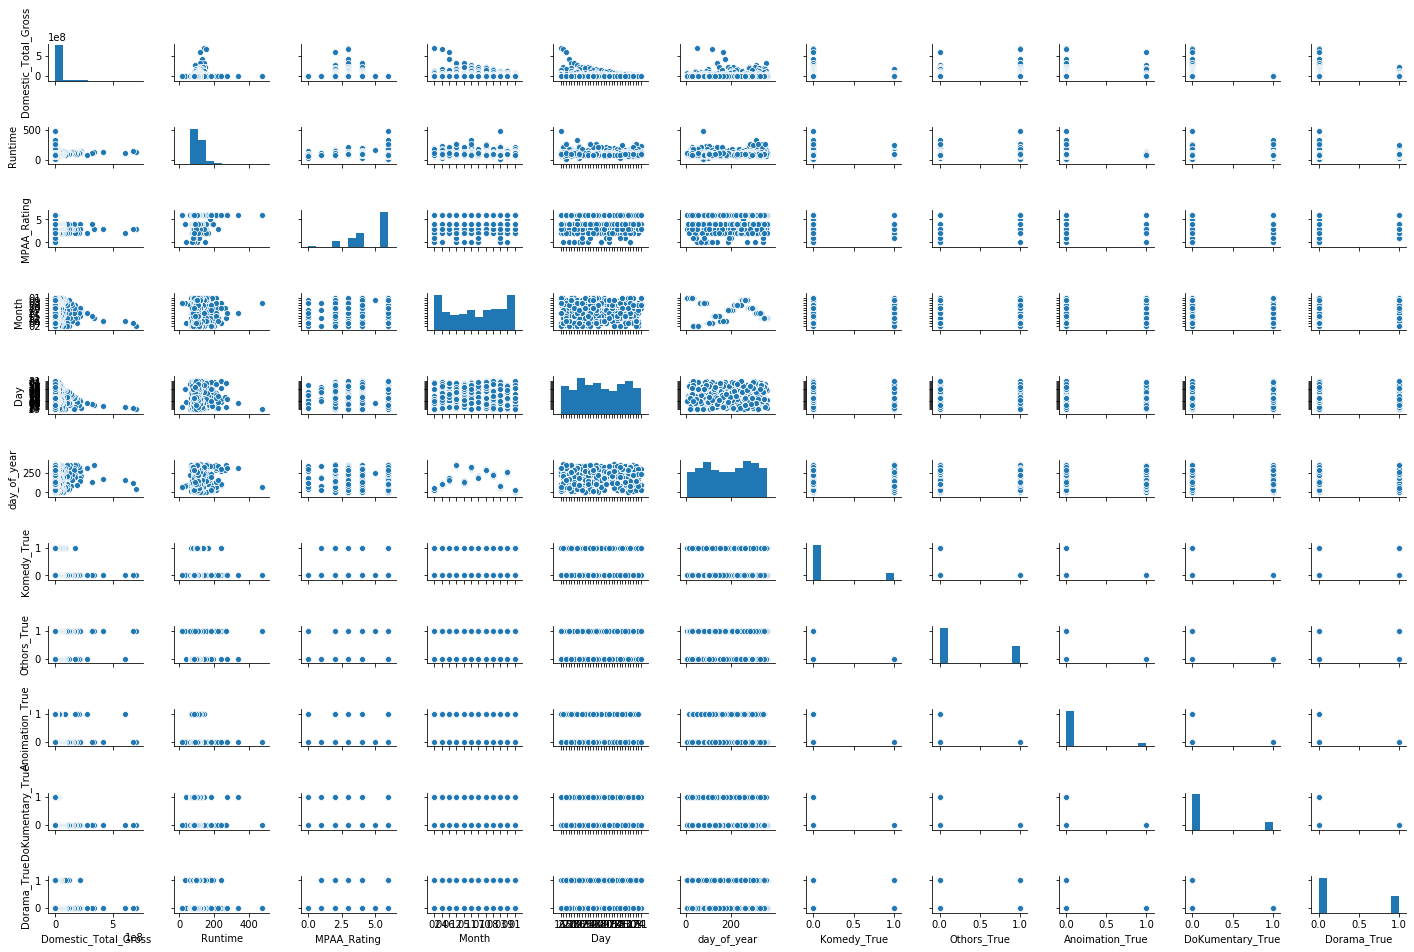

In [83]:
sns.pairplot(df3, height=1.2, aspect=1.5)

In [84]:
df3.corr()

,Domestic_Total_Gross,Runtime,MPAA_Rating,day_of_year,Komedy_True,Othors_True,Anoimation_True,DoKumentary_True,Dorama_True
Domestic_Total_Gross,1.000000,0.070475,-0.258817,0.011104,-0.034629,0.157783,0.060494,-0.109949,-0.106186
Runtime,0.070475,1.000000,0.073499,0.090525,-0.103150,0.302625,-0.119599,-0.201483,-0.029273
MPAA_Rating,-0.258817,0.073499,1.000000,-0.047312,-0.019693,-0.050907,-0.205658,0.202294,0.047108
day_of_year,0.011104,0.090525,-0.047312,1.000000,-0.043233,-0.001021,0.010390,0.002470,0.024350
Komedy_True,-0.034629,-0.103150,-0.019693,-0.043233,1.000000,-0.303412,-0.127852,-0.207670,0.016829
Othors_True,0.157783,0.302625,-0.050907,-0.001021,-0.303412,1.000000,-0.201717,-0.327650,-0.406361
Anoimation_True,0.060494,-0.119599,-0.205658,0.010390,-0.127852,-0.201717,1.000000,-0.138065,-0.202248
DoKumentary_True,-0.109949,-0.201483,0.202294,0.002470,-0.207670,-0.327650,-0.138065,1.000000,-0.328512
Dorama_True,-0.106186,-0.029273,0.047108,0.024350,0.016829,-0.406361,-0.202248,-0.328512,1.000000


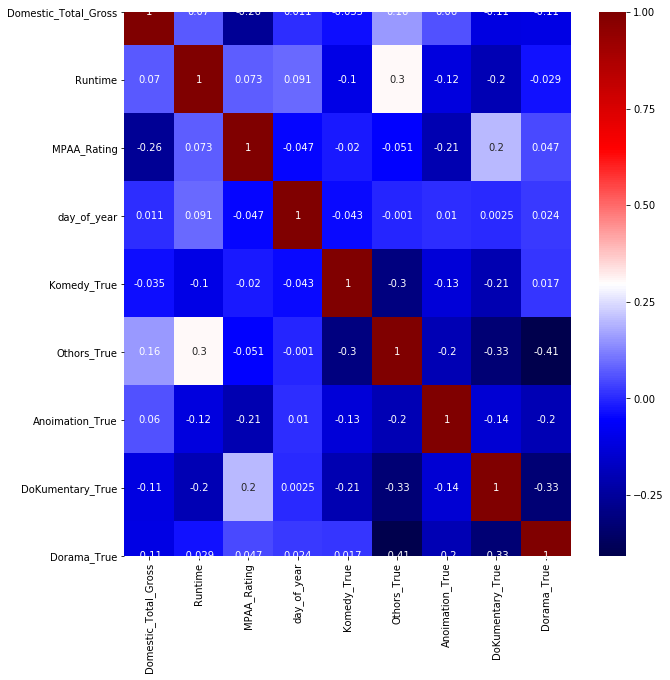

In [85]:
plt.figure(figsize=(10, 10))
sns.heatmap(df3.corr(),cmap="seismic",annot=True)
plt.xlim(0.1,10.1)
plt.ylim(10.1,0.1)

Text(0.5, 1.0, 'Distribution of Domestic_Total_Gross')

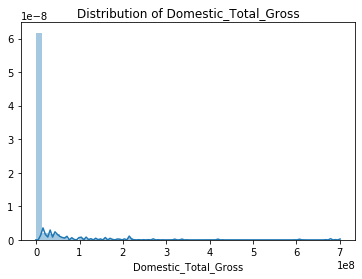

In [86]:
sns.distplot(df3["Domestic_Total_Gross"], kde=True)
plt.title("Distribution of Domestic_Total_Gross")
#plt.savefig("Domestic_Total_Gross", format='svg')

In [87]:
df3['Domestic_Total_Gross'] = np.log(df3['Domestic_Total_Gross'])

Text(0.5, 1.0, 'Distribution of Domestic_Total_Gross')

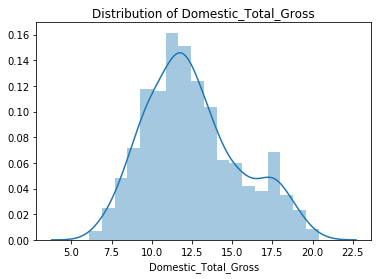

In [88]:
sns.distplot(df3["Domestic_Total_Gross"], kde=True)
plt.title("Distribution of Domestic_Total_Gross")
#plt.savefig("Domestic_Total_Gross", format='svg')

(10.1, 0.1)

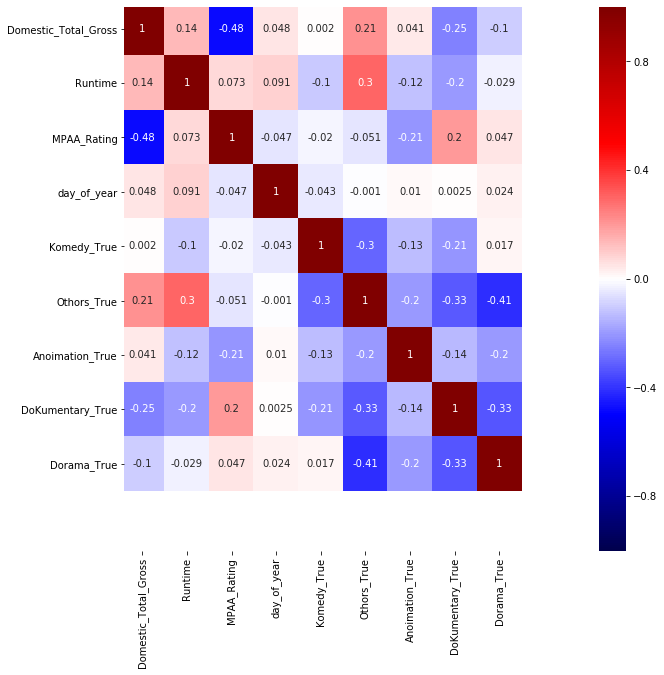

In [138]:
plt.figure(figsize=(10, 10))
sns.heatmap(df3.corr(), cmap="seismic",annot=True, vmin=-1,vmax=1)
plt.xlim(0.1,10.1)
plt.ylim(10.1,0.1)


In [108]:
df4=df3.copy()

In [111]:
df4=df4.drop(columns=['Release_Date'])

In [112]:
x=df4.loc[:,[ 'Runtime', 'MPAA_Rating','Month', 'Day', 'day_of_year', 'Komedy_True', 'Othors_True','Anoimation_True', 'DoKumentary_True', 'Dorama_True']].astype(float)
y=df4.loc[:,"Domestic_Total_Gross"].astype(float)

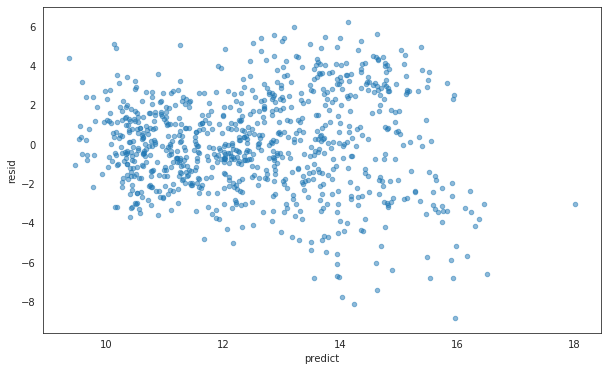

In [126]:
# create residual plot
df4['predict']=results.predict(x)
df4['resid']= y-df4.predict
with sns.axes_style('white'):
    plot = df4.plot(
        kind='scatter', x='predict', y='resid', alpha=0.5, figsize=(10,6))

In [114]:

movie_model = sm.OLS(y, x, data=df4)

results = movie_model.fit()


results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Domestic_Total_Gross   R-squared (uncentered):                   0.963
Model:                              OLS   Adj. R-squared (uncentered):              0.963
Method:                   Least Squares   F-statistic:                              2234.
Date:                  Mon, 16 Sep 2019   Prob (F-statistic):                        0.00
Time:                          11:53:19   Log-Likelihood:                         -2018.6
No. Observations:                   868   AIC:                                      4057.
Df Residuals:                       858   BIC:                                      4105.
Df Model:                            10                                                  
Covariance Type:              nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Runtime              0.0107      0.003      3.780      0.000       0.005       0.016
MPAA_Rating         -0.8363      0.057    -14.783      0.000      -0.947      -0.725
Month               15.8380      0.572     27.704      0.000      14.716      16.960
Day                  0.5255      0.019     27.333      0.000       0.488       0.563
day_of_year         -0.5196      0.019    -27.389      0.000      -0.557      -0.482
Komedy_True         -0.7824      0.367     -2.130      0.033      -1.503      -0.061
Othors_True         -0.5320      0.419     -1.268      0.205      -1.355       0.291
Anoimation_True     -1.6261      0.512     -3.179      0.002      -2.630      -0.622
DoKumentary_True    -2.1092      0.464     -4.542      0.000      -3.021      -1.198
Dorama_True         -1.4758      0.375     -3.934      0.000      -2.212      -0.740
==============================================================================
Omnibus:                        4.853   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.777
Skew:                          -0.181   Prob(JB):                       0.0917
Kurtosis:                       3.038   Cond. No.                     2.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 0 to 867
Data columns (total 11 columns):
Domestic_Total_Gross    868 non-null float64
Runtime                 868 non-null float64
MPAA_Rating             868 non-null int8
Month                   868 non-null object
Day                     868 non-null object
day_of_year             868 non-null int64
Komedy_True             868 non-null uint8
Othors_True             868 non-null uint8
Anoimation_True         868 non-null uint8
DoKumentary_True        868 non-null uint8
Dorama_True             868 non-null uint8
dtypes: float64(2), int64(1), int8(1), object(2), uint8(5)
memory usage: 45.8+ KB
